# Bootstrapping to find a 95% confidence interval

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from datascience import *
%matplotlib inline

In [85]:
faithful = Table().read_table("../data/faithful-new.csv")
faithful.show(3)

duration,wait
3.6,79
1.8,54
3.333,74


In [86]:
faithful.num_rows

272

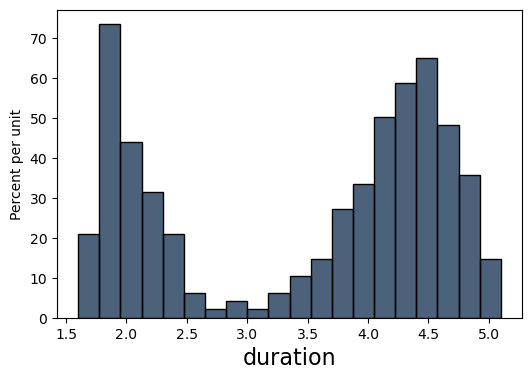

In [87]:
faithful.hist('duration', bins=20)

In [88]:
true_avg_duration = np.mean(faithful.column("duration"))
print(f"The true mean duration of Old Faithful geyser eruptions is {true_avg_duration:.2f} minutes")

The true mean duration of Old Faithful geyser eruptions is 3.49 minutes


## Old Faithful
### The true confidence interval for the mean based on a sample size of 50
This data set is clearly bimodal (two clusters), has 272 data points, and the mean duration of eruptions is 3.49 minutes. Let's pretend this is the true population and that 3.49 is the real population mean, but that we only have a sample data set of 50 data points. How well can we estimate the true mean from a sample of 50 points? 

Well, if we have the full data set, we can answer the true answer by sampling 50 data points over and over to find out confidence interval. This is analogous to performing an experiment over and over to get new data.

In [89]:
our_data = faithful.sample(50, with_replacement=False)
our_mean = np.mean(our_data.column("duration"))

print("Based on a sample size of 50, we got a mean of:", our_mean)

Based on a sample size of 50, we got a mean of: 3.5213


In [90]:
def one_sample_mean():
    """A function to sample the orginal data"""
    resample = faithful.sample(50, with_replacement=False)
    return np.mean(resample.column("duration"))

In [91]:
num_repetitions = 5000
sample_means = make_array()
for i in np.arange(num_repetitions):
    sample_means = np.append(sample_means, one_sample_mean())

In [92]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, sample_means)
right = percentile(97.5, sample_means)

make_array(left, right)

array([ 3.20228,  3.76562])

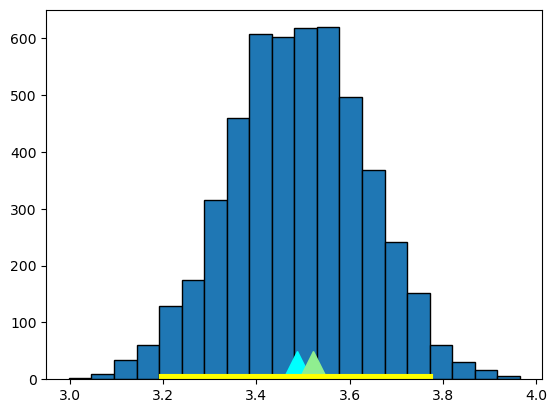

In [93]:
plt.hist(sample_means, bins=20)
plt.plot(true_avg_duration, 0, marker="^", markersize=40, color="cyan")
plt.plot(our_mean, 0, marker="^", markersize=40, color="lightgreen")
plt.plot([left, right], [0, 0], color='yellow', lw=8);

So the true mean duration is 3.49 minutes, Our data, a sample of 50 values, yielded an estimate of this mean that was off, but with the 95% confidence interval.

This 95% confidence interval, however, we calculated using the full data set. In practice, we rarely have that, because we are unlikely to repeat our data collection thousands of times. What to do?

We bootstrap! We treat our sample of 50 data points as if it were the full dataset and resample it instead to estimate the confidence interval.

In [94]:
def one_bootstrap_sample_mean():
    """A function to sample the orginal data"""
    resample = faithful.sample(with_replacement=True)
    return np.mean(resample.column("duration"))

In [95]:
num_repetitions = 5000
bootstrap_sample_means = make_array()
for i in np.arange(num_repetitions):
    bootstrap_sample_means = np.append(bootstrap_sample_means, one_bootstrap_sample_mean())

In [96]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bootstrap_sample_means)
right = percentile(97.5, bootstrap_sample_means)

make_array(left, right)

array([ 3.35332721,  3.62033088])

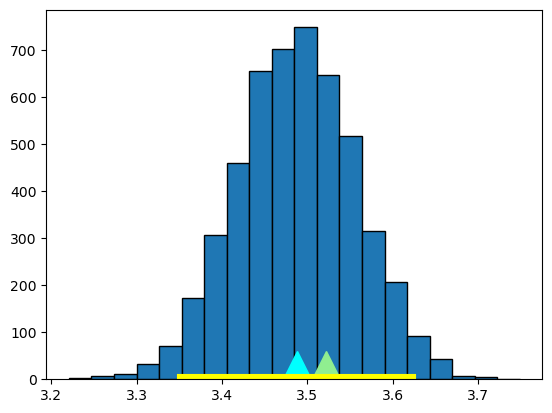

In [97]:
plt.hist(bootstrap_sample_means, bins=20)
plt.plot(true_avg_duration, 0, marker="^", markersize=40, color="cyan")
plt.plot(our_mean, 0, marker="^", markersize=40, color="lightgreen")
plt.plot([left, right], [0, 0], color='yellow', lw=8);

In [98]:
# Our final result
print(f"The true mean of the Old Faithful eruption duration is {true_avg_duration:.2f}")
print("Based on a sample of 50 data points,")
print(f"the mean is {our_mean:.2f},")
print(f"with 95% confidence that the true mean lies between {left:.2f} and {right:.2f}")

The true mean of the Old Faithful eruption duration is 3.49
Based on a sample of 50 data points,
the mean is 3.52,
with 95% confidence that the true mean lies between 3.35 and 3.62
